In [1]:
import os
import torch
import matplotlib.pyplot as plt
from bmadx.plot import plot_projections
from bmadx.pmd_utils import openpmd_to_bmadx_beam, bmadx_beam_to_openpmd
from phase_space_reconstruction.analysis import screen_stats, get_beam_fraction

In [2]:
data_dir = 'data'
t_scan_dir = os.path.join(data_dir, 't_scan')
n_par_dir = os.path.join(data_dir, 'n_par')

In [3]:
train_dset_3d_scan = torch.load(os.path.join(t_scan_dir, '3D_scan_train.dset')) 
beam_3d_scan_100_000 = torch.load(os.path.join(t_scan_dir, '3D_scan_100_000.pt'))

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='px (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='y (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='py (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='z (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='x (mm)', ylabel='pz (%)'>,
         <Axes: xlabel='px (mrad)'>, <Axes: xlabel='y (mm)'>,
         <Axes: xlabel='py (mrad)'>, <Axes: xlabel='z (mm)'>,
         <Axes: xlabel='pz (%)'>]], dtype=object))

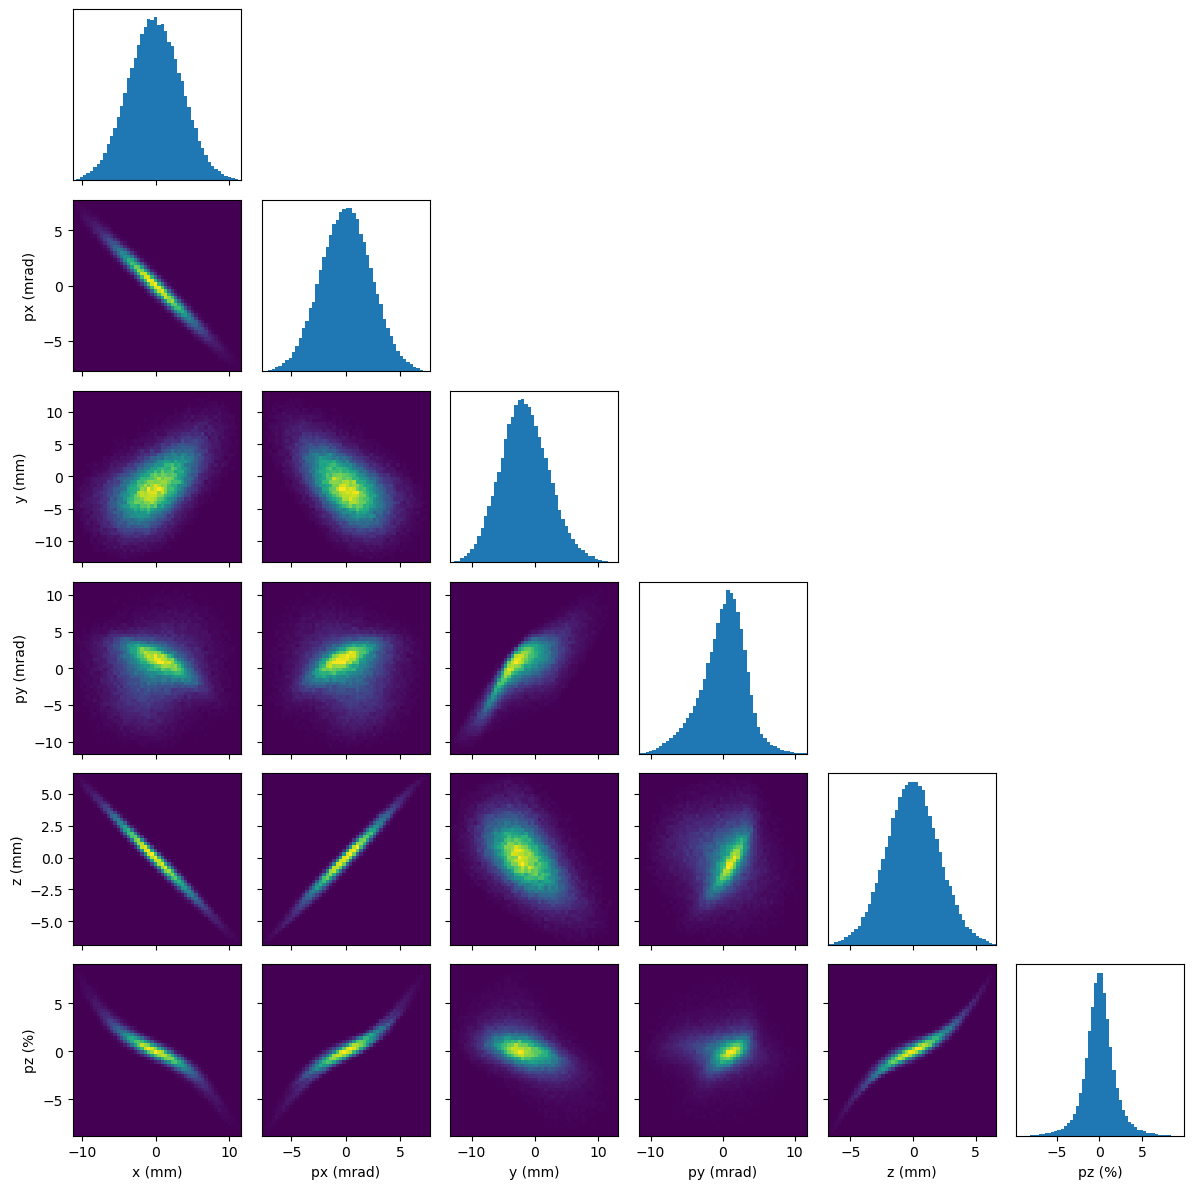

In [4]:
plot_projections(beam_3d_scan_100_000.numpy_particles())

In [5]:
pmd_beam = bmadx_beam_to_openpmd(beam_3d_scan_100_000)
p0c = 1.0*beam_3d_scan_100_000.p0c.numpy()
p0c

43360000.0

In [16]:
pmd_frac = get_beam_fraction(pmd_beam, 0.5)

In [17]:
beam_frac = openpmd_to_bmadx_beam(pmd_frac, p0c)

(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='px (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='y (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='py (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='z (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='x (mm)', ylabel='pz (%)'>,
         <Axes: xlabel='px (mrad)'>, <Axes: xlabel='y (mm)'>,
         <Axes: xlabel='py (mrad)'>, <Axes: xlabel='z (mm)'>,
         <Axes: xlabel='pz (%)'>]], dtype=object))

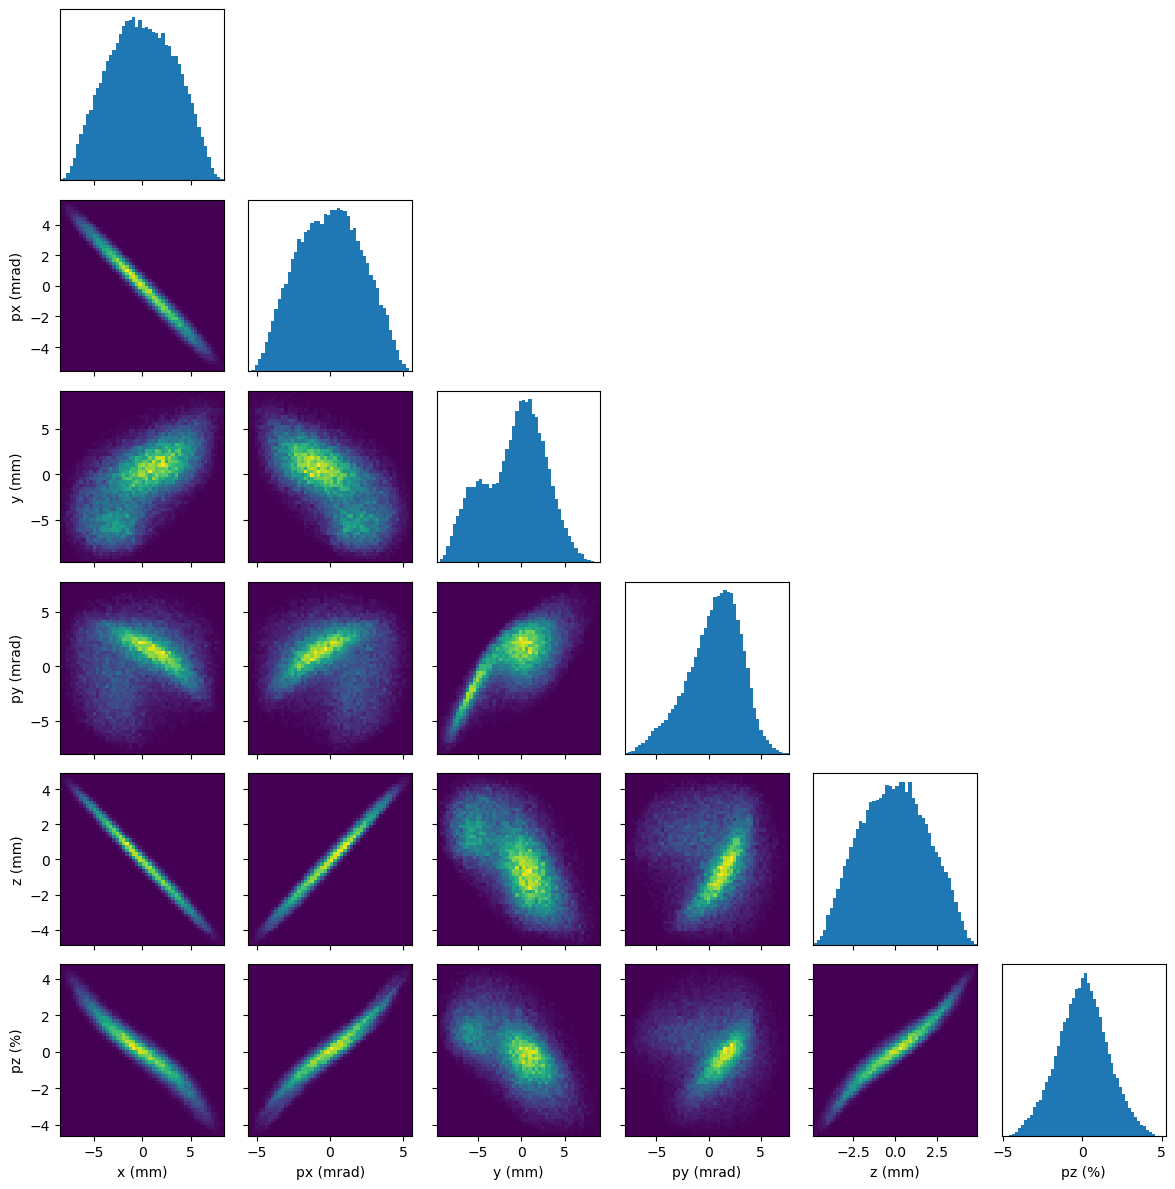

In [18]:
plot_projections(beam_frac)